In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import networkx as nx
from itertools import combinations
from collections import Counter

In [3]:
# Define the path to the Gold folder
gold_path = r"C:\Users\archa\Desktop\Capstone project\Data\Gold"

# File names
files = {
    'counselchat': 'counselchat_gold.csv',
    'facebook': 'facebook_gold.csv',
    'goemotions': 'goemotions_gold.csv'
}

# Load datasets
df_counselchat = pd.read_csv(os.path.join(gold_path, files['counselchat']))
df_facebook = pd.read_csv(os.path.join(gold_path, files['facebook']))
df_goemotions = pd.read_csv(os.path.join(gold_path, files['goemotions']))

In [4]:
print("CounselChat:", df_counselchat.shape)
print("Facebook:", df_facebook.shape)
print("GoEmotions:", df_goemotions.shape)

CounselChat: (1383, 12)
Facebook: (64632, 6)
GoEmotions: (57732, 41)


In [5]:
# Univariate Non-Graphical EDA
summary_stats = df_goemotions.describe(include='all')

# Central Tendency, Skewness, and Kurtosis
central_stats = {
    'mean': df_goemotions.mean(numeric_only=True),
    'median': df_goemotions.median(numeric_only=True),
    'mode': df_goemotions.mode(numeric_only=True).iloc[0],
    'skewness': df_goemotions.skew(numeric_only=True),
    'kurtosis': df_goemotions.kurtosis(numeric_only=True)
}

In [6]:
# Print each statistical measure
print("\n📈 Central Tendency and Distribution Metrics:")
for stat_name, stat_value in central_stats.items():
    print(f"\n🔹 {stat_name.capitalize()}:\n{stat_value}")


📈 Central Tendency and Distribution Metrics:

🔹 Mean:
created_utc             1.547659e+09
rater_id                3.771854e+01
example_very_unclear    1.460195e-02
admiration              8.376637e-02
amusement               4.572854e-02
anger                   3.831497e-02
annoyance               6.012264e-02
approval                8.380101e-02
caring                  2.747177e-02
confusion               3.453890e-02
curiosity               4.798032e-02
desire                  1.754659e-02
disappointment          3.753551e-02
disapproval             5.303818e-02
disgust                 2.348784e-02
embarrassment           1.091249e-02
excitement              2.676159e-02
fear                    1.529481e-02
gratitude               5.975889e-02
grief                   3.065891e-03
joy                     3.784729e-02
love                    4.068801e-02
nervousness             8.262316e-03
optimism                4.205640e-02
pride                   6.062496e-03
realization         

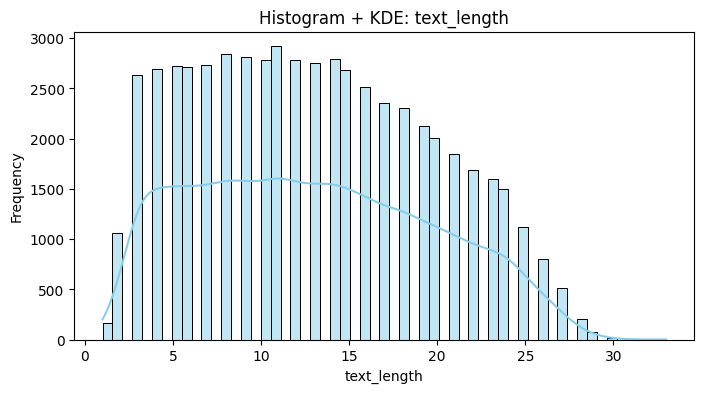

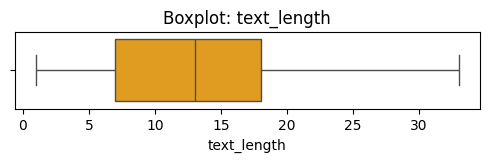

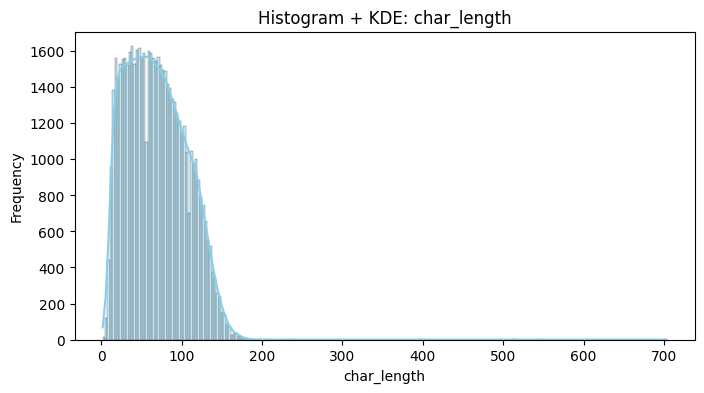

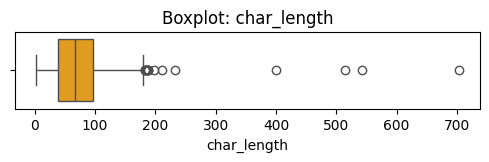

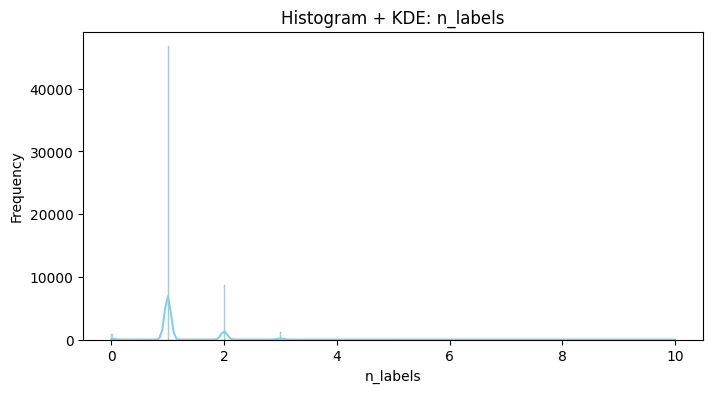

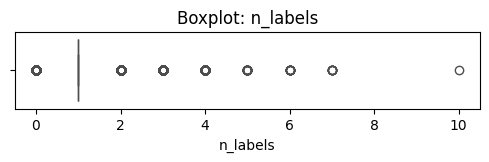

In [7]:
# Univariate Graphical EDA
for col in ['text_length', 'char_length', 'n_labels']:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_goemotions[col], kde=True, color='skyblue')
    plt.title(f'Histogram + KDE: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(6, 1))
    sns.boxplot(x=df_goemotions[col], color='orange')
    plt.title(f'Boxplot: {col}')
    plt.show()

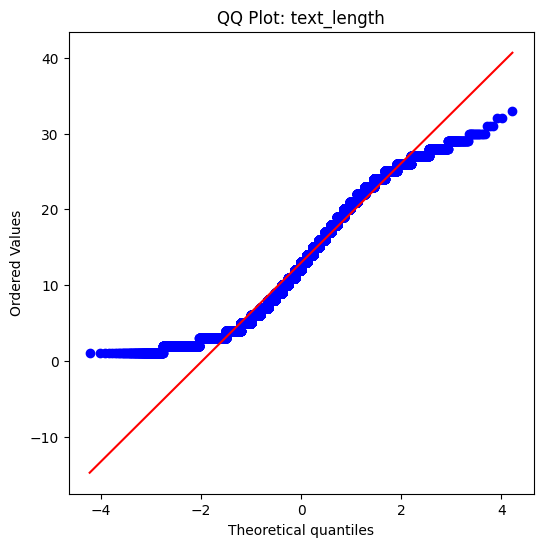

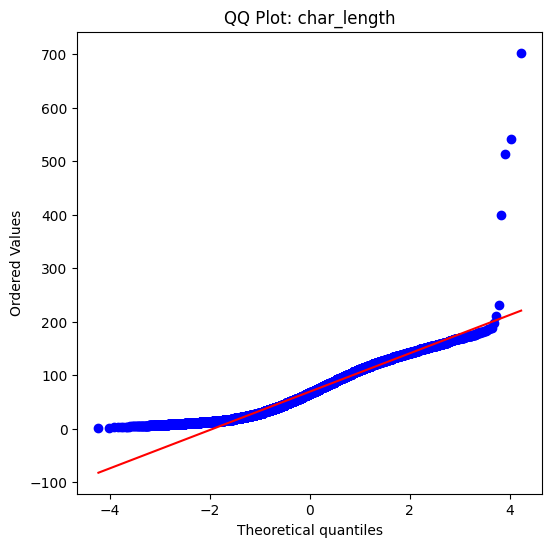

In [8]:
# Quantile-Normal Plot
for col in ['text_length', 'char_length']:
    plt.figure(figsize=(6, 6))
    stats.probplot(df_goemotions[col], dist="norm", plot=plt)
    plt.title(f'QQ Plot: {col}')
    plt.show()

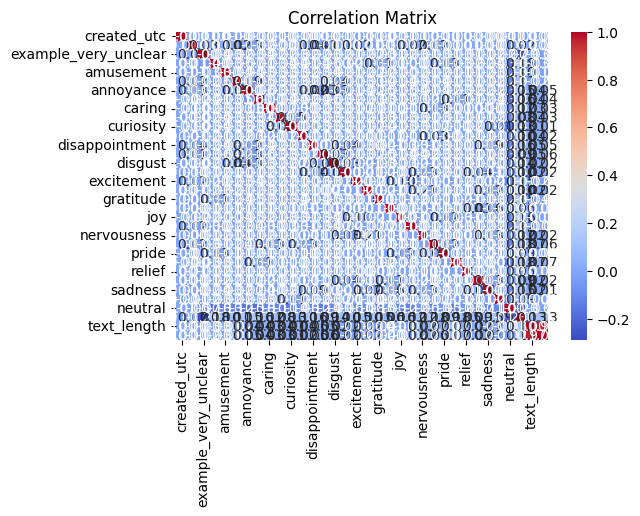

In [9]:
# Multivariate Non-Graphical EDA (correlation)
correlation_matrix = df_goemotions.corr(numeric_only=True)
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [10]:
# Cross-tabulation
crosstab_result = pd.crosstab(df_goemotions['primary_emotion'], df_goemotions['n_labels'])

# Univariate stats by category
grouped_stats = df_goemotions.groupby('primary_emotion')[['text_length', 'char_length']].agg(['mean', 'median', 'std'])


In [11]:
from IPython.display import display

# Display summary stats
print(" Summary Statistics:")
display(summary_stats)

 Summary Statistics:


,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,realization,relief,remorse,sadness,surprise,neutral,n_labels,primary_emotion,text_length,char_length
count,57732,57732,57732,57732,57732,57732,5.773200e+04,57732.000000,57732,57732.000000,...,57732.000000,57732.000000,57732.000000,57732.000000,57732.000000,57732.000000,57732.000000,57732,57732.000000,57732.000000
unique,57732,57732,48960,483,44711,54665,NaN,NaN,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,NaN,NaN
top,That game hurt.,eew5j0j,[deleted],loveafterlockup,t3_ahcnq2,t3_ae6ejj,NaN,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral,NaN,NaN
freq,1,1,1056,241,25,16,NaN,NaN,56889,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15470,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.547659e+09,37.718544,NaN,0.083766,...,0.040861,0.006357,0.012281,0.031750,0.025982,0.267962,1.189236,NaN,12.962066,69.087768
std,NaN,NaN,NaN,NaN,NaN,NaN,7.696604e+05,23.013402,NaN,0.277040,...,0.197970,0.079477,0.110138,0.175336,0.159083,0.442902,0.501053,NaN,6.667533,36.513467
min,NaN,NaN,NaN,NaN,NaN,NaN,1.546301e+09,0.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,2.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.546994e+09,19.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,7.000000,39.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.547665e+09,37.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,13.000000,66.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.548321e+09,57.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,NaN,18.000000,96.000000


In [12]:
# Display central stats
print("\n Central Tendency and Distribution Metrics:")
for stat_name, stat_value in central_stats.items():
    print(f"\n🔹 {stat_name.capitalize()}:\n{stat_value}")


 Central Tendency and Distribution Metrics:

🔹 Mean:
created_utc             1.547659e+09
rater_id                3.771854e+01
example_very_unclear    1.460195e-02
admiration              8.376637e-02
amusement               4.572854e-02
anger                   3.831497e-02
annoyance               6.012264e-02
approval                8.380101e-02
caring                  2.747177e-02
confusion               3.453890e-02
curiosity               4.798032e-02
desire                  1.754659e-02
disappointment          3.753551e-02
disapproval             5.303818e-02
disgust                 2.348784e-02
embarrassment           1.091249e-02
excitement              2.676159e-02
fear                    1.529481e-02
gratitude               5.975889e-02
grief                   3.065891e-03
joy                     3.784729e-02
love                    4.068801e-02
nervousness             8.262316e-03
optimism                4.205640e-02
pride                   6.062496e-03
realization          

In [13]:
# Display cross-tabulation
print("\n Cross-tabulation of Primary Emotion vs. Number of Labels:")
display(crosstab_result)


 Cross-tabulation of Primary Emotion vs. Number of Labels:


n_labels,0,1,2,3,4,5,6,7,10
primary_emotion,,,,,,,,,
admiration,843,2922,1551,314,25,12,6,5,1
amusement,0,1709,692,104,9,0,1,0,0
anger,0,1407,617,126,17,9,2,0,0
annoyance,0,2063,809,113,15,0,0,0,0
approval,0,3041,1054,140,12,1,0,0,0
caring,0,907,363,53,6,3,0,1,0
confusion,0,1332,394,50,7,0,1,1,0
curiosity,0,1655,485,57,2,0,0,0,0
desire,0,573,198,27,4,0,0,0,0


In [14]:
# Display univariate stats by category
print("\n Univariate Statistics by Emotion Category:")
display(grouped_stats)


 Univariate Statistics by Emotion Category:


text_length                  char_length                  
                       mean median       std        mean median        std
primary_emotion                                                           
admiration        12.091742   11.0  6.709007   65.146505   61.0  37.269527
amusement         12.717694   12.0  6.396522   66.664016   64.0  34.039924
anger             12.327365   12.0  6.828148   66.426538   61.0  37.807607
annoyance         14.089667   14.0  6.566277   76.198000   75.0  36.025048
approval          13.770009   14.0  6.564424   73.371234   71.0  35.963765
caring            13.936984   14.0  6.793540   73.019505   72.0  36.761175
confusion         14.078992   14.0  6.350817   74.290196   72.0  34.602805
curiosity         13.030468   13.0  6.297701   69.281037   66.0  34.603699
desire            14.098504   14.0  6.160486   71.536160   70.0  32.655762
disappointment    14.299060   14.0  6.357227   76.161575   75.0  34.240723
disapproval       13.921992   14.0  6.432178   75.272614   74.0  35.635579
disgust           13.249417   13.0  6.435990   72.317016   69.5  35.232281
embarrassment     13.974478   13.0  6.369754   75.257541   71.0  34.563134
excitement        11.613961   11.0  6.666781   61.502103   58.0  35.476616
fear              13.595065   14.0  6.647917   73.323657   72.0  36.105764
gratitude         11.355582   10.0  6.652418   60.332539   55.0  35.398159
grief             13.038168   12.0  6.520270   68.893130   66.0  33.801059
joy               12.351608   11.5  6.508892   64.298246   61.0  34.894976
love              11.873856   11.0  6.713937   60.507843   55.0  35.703656
nervousness       14.017094   14.0  6.964635   74.551282   75.0  37.495515
neutral           12.639367   12.0  6.810822   67.765223   64.0  37.780626
optimism          14.463918   14.0  6.300024   75.568483   75.0  34.205620
pride             11.929348   12.0  6.235839   61.804348   61.5  33.773511
realization       14.708899   15.0  6.150050   78.415535   76.5  34.294507
relief            13.008511   13.0  6.105197   68.800000   69.0  32.692794
remorse           13.000000   12.0  6.438421   68.230769   65.0  34.444258
sadness           12.466203   12.0  6.812218   65.462227   61.0  36.916931
surprise          12.151188   11.0  6.441658   65.560475   61.0  35.081035

In [15]:
# Simulated binary label columns for demo (replace with actual GoEmotions emotion columns)
emotion_labels = ['joy', 'anger', 'sadness', 'surprise']
for label in emotion_labels:
    df_goemotions[label] = df_goemotions['primary_emotion'].apply(lambda x: 1 if x == label else 0)


In [ ]:
df_goemotions = pd.read_csv(f"{gold_path}/goemotions_gold.csv")

# Filter columns with exactly 0s and 1s only
emotion_cols = [
    col for col in df_goemotions.columns
    if set(df_goemotions[col].dropna().unique()).issubset({0, 1})
    and df_goemotions[col].dtype in [np.int64, np.int32, np.uint8]
]

# Confirm how many emotion columns were found
print(f" Detected {len(emotion_cols)} emotion columns: {emotion_cols}")



✅ Detected 28 emotion columns: ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']


In [24]:
# Label cardinality: total 1s
label_cardinality = df_goemotions[emotion_cols].sum().sum()

# Mean labels per row
mean_labels_per_row = df_goemotions[emotion_cols].sum(axis=1).mean()

#  Rows with no labels
rows_with_no_labels = (df_goemotions[emotion_cols].sum(axis=1) == 0).sum()

# Print metrics
print("\n🔹 Dataset Stats")
print(f"Label Cardinality: {label_cardinality}")
print(f"Mean Labels per Row: {mean_labels_per_row:.2f}")
print(f"Rows with No Labels: {rows_with_no_labels}")




🔹 Dataset Stats
Label Cardinality: 68657
Mean Labels per Row: 1.19
Rows with No Labels: 843


C:\Users\archa\AppData\Local\Temp\ipykernel_25868\392330568.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_distribution.index, y=label_distribution.values, palette="viridis")


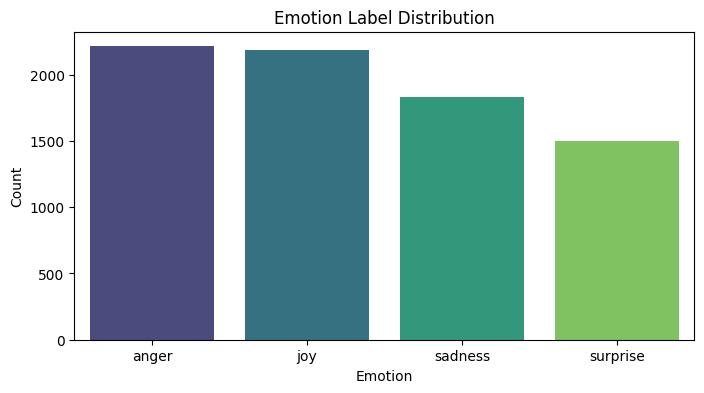

In [25]:
# Label distribution
label_distribution = df_goemotions[emotion_labels].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 4))
sns.barplot(x=label_distribution.index, y=label_distribution.values, palette="viridis")
plt.title("Emotion Label Distribution")
plt.ylabel("Count")
plt.xlabel("Emotion")
plt.show()

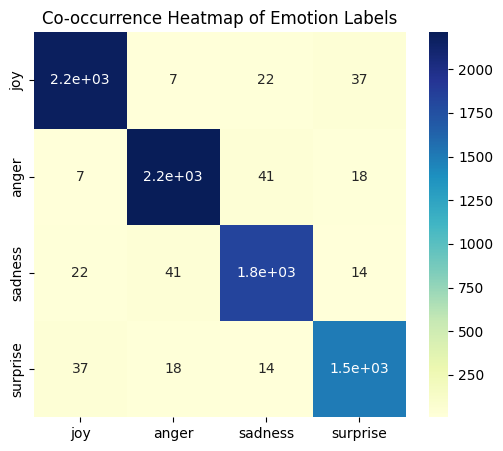

In [26]:
# Co-occurrence matrix
co_occurrence = np.dot(df_goemotions[emotion_labels].T, df_goemotions[emotion_labels])
plt.figure(figsize=(6, 5))
sns.heatmap(co_occurrence, xticklabels=emotion_labels, yticklabels=emotion_labels, annot=True, cmap='YlGnBu')
plt.title("Co-occurrence Heatmap of Emotion Labels")
plt.show()

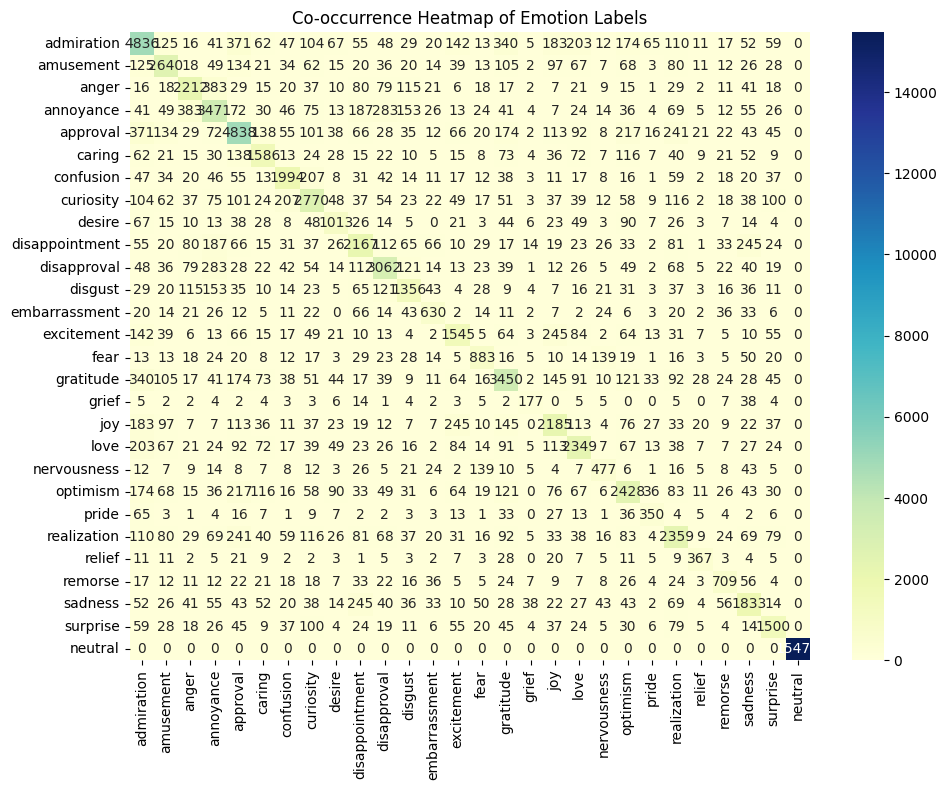

In [27]:
# Visual: Co-occurrence heatmap
co_matrix = np.dot(df_goemotions[emotion_cols].T, df_goemotions[emotion_cols])
plt.figure(figsize=(10, 8))
sns.heatmap(co_matrix, xticklabels=emotion_cols, yticklabels=emotion_cols, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Co-occurrence Heatmap of Emotion Labels")
plt.tight_layout()
plt.show()

In [28]:
# Count co-occurring emotion pairs
pair_counts = Counter()
for _, row in df_goemotions[emotion_cols].iterrows():
    active = row[row == 1].index.tolist()
    if len(active) > 1:
        pair_counts.update(combinations(sorted(active), 2))


In [29]:
# Top 10 co-occurring pairs
top_10_pairs = pair_counts.most_common(10)
df_top_10 = pd.DataFrame(top_10_pairs, columns=["Emotion Pair", "Frequency"])


In [30]:
# Build graph from pair counts
G = nx.Graph()
for (e1, e2), w in pair_counts.items():
    G.add_edge(e1, e2, weight=w)

In [31]:
# Louvain community detection
try:
    import community as community_louvain
    partition = community_louvain.best_partition(G)
except ImportError:
    partition = {node: 0 for node in G.nodes()}
nx.set_node_attributes(G, partition, 'community')

# Filter strongest edges (above 50% of max)
threshold = max(pair_counts.values()) * 0.5
strong_edges = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] >= threshold]


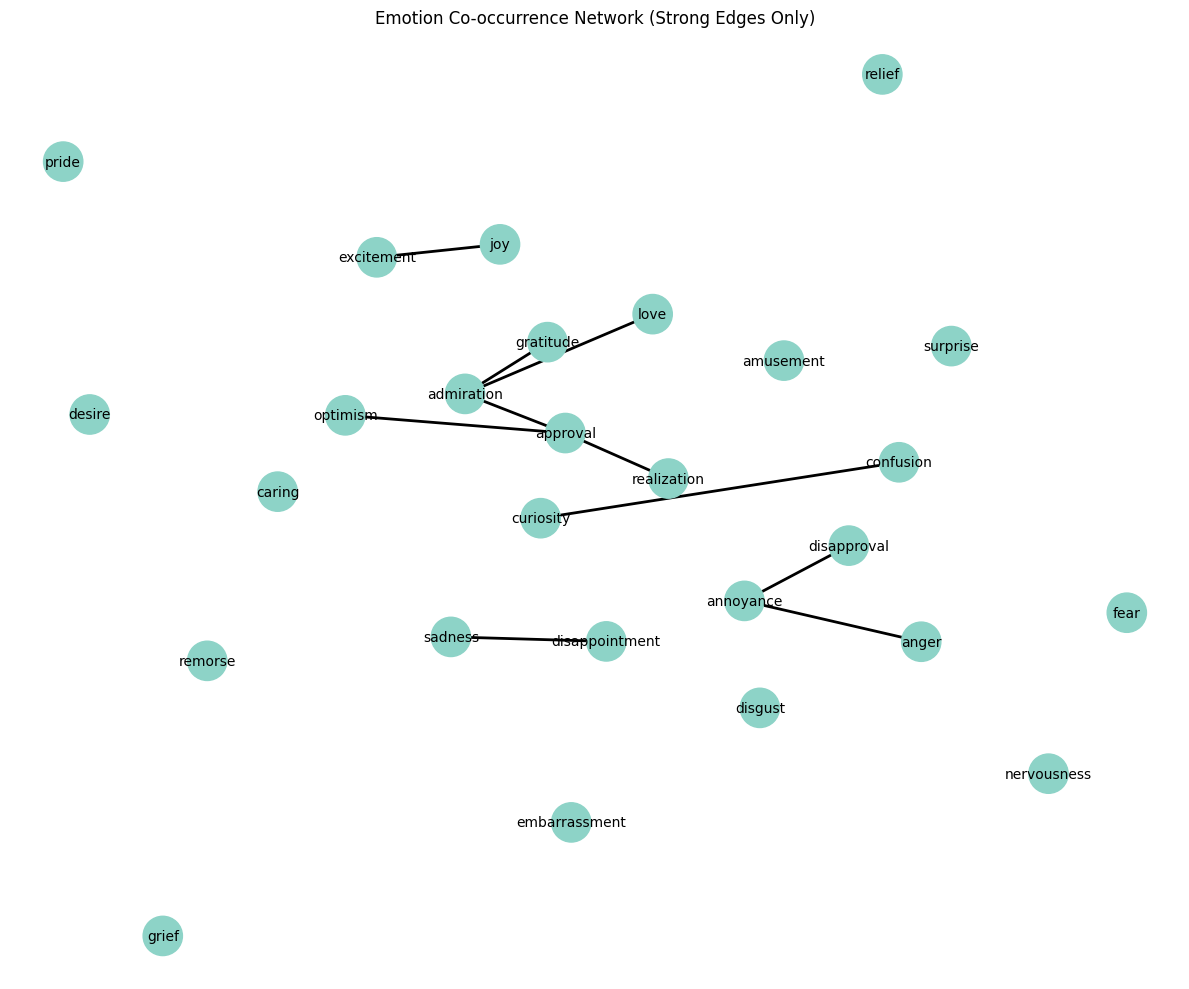

In [32]:
# Visual: Co-occurrence network
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_color=list(partition.values()), cmap=plt.cm.Set3, node_size=800)
nx.draw_networkx_labels(G, pos, font_size=10)
nx.draw_networkx_edges(G, pos, edgelist=strong_edges, width=2)
plt.title("Emotion Co-occurrence Network (Strong Edges Only)")
plt.axis("off")
plt.tight_layout()
plt.show()

In [33]:
# Display metrics in table
summary_df = pd.DataFrame({
    "Metric": ["Label Cardinality", "Mean Labels per Row", "Rows with No Labels"],
    "Value": [label_cardinality, mean_labels_per_row, rows_with_no_labels]
})


In [39]:
from IPython.display import display

print("\n🔝 Top 10 Emotion Co-occurrences:")
display(df_top_10)


🔝 Top 10 Emotion Co-occurrences:


,Emotion Pair,Frequency
0,"(anger, annoyance)",383
1,"(admiration, approval)",371
2,"(admiration, gratitude)",340
3,"(annoyance, disapproval)",283
4,"(disappointment, sadness)",245
5,"(excitement, joy)",245
6,"(approval, realization)",241
7,"(approval, optimism)",217
8,"(confusion, curiosity)",207
9,"(admiration, love)",203


In [35]:
# Diagnose how many rows have >1 label
multi_label_rows = df_goemotions[emotion_cols].sum(axis=1) > 1
num_multi_label_rows = multi_label_rows.sum()
print(f"Rows with >1 emotion label: {num_multi_label_rows}")


Rows with >1 emotion label: 10148


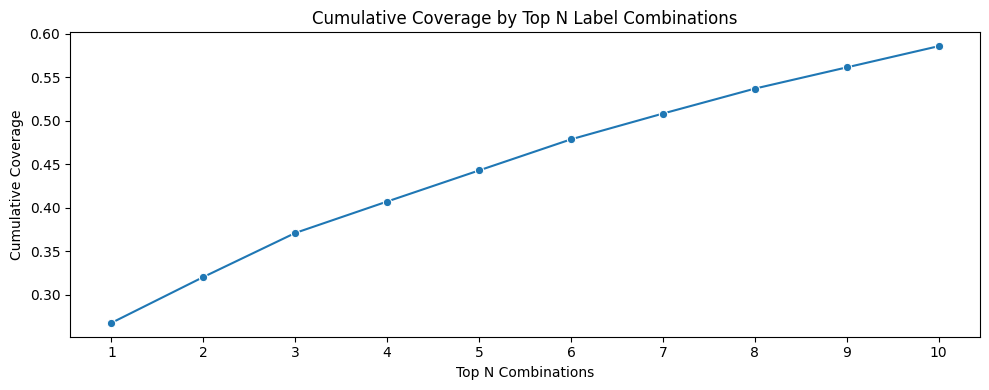

In [41]:
# --- Label Combination Analysis ---
df_goemotions['combo'] = df_goemotions[emotion_cols].apply(lambda row: tuple(row.index[row == 1]), axis=1)
combo_counts = df_goemotions['combo'].value_counts()

# Cumulative coverage
cumulative_coverage = combo_counts.cumsum() / combo_counts.sum()
cumulative_coverage_top10 = cumulative_coverage.head(10).reset_index()
cumulative_coverage_top10.columns = ['Combination', 'Cumulative Coverage']

# Entropy of label combination distribution
probs = combo_counts / combo_counts.sum()
entropy = -np.sum(probs * np.log2(probs))

# Multi-label rate per emotion
multi_label_rows = df_goemotions[emotion_cols].sum(axis=1) > 1
multi_label_rate = df_goemotions.loc[multi_label_rows, emotion_cols].sum() / df_goemotions[emotion_cols].sum()

# Plot cumulative coverage
plt.figure(figsize=(10, 4))
sns.lineplot(data=cumulative_coverage_top10, x=cumulative_coverage_top10.index + 1, y='Cumulative Coverage', marker='o')
plt.title("Cumulative Coverage by Top N Label Combinations")
plt.xlabel("Top N Combinations")
plt.ylabel("Cumulative Coverage")
plt.xticks(ticks=range(1, 11))
plt.tight_layout()
plt.show()

C:\Users\archa\AppData\Local\Temp\ipykernel_25868\3896057091.py:24: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\archa\Desktop\Capstone project\capstone\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


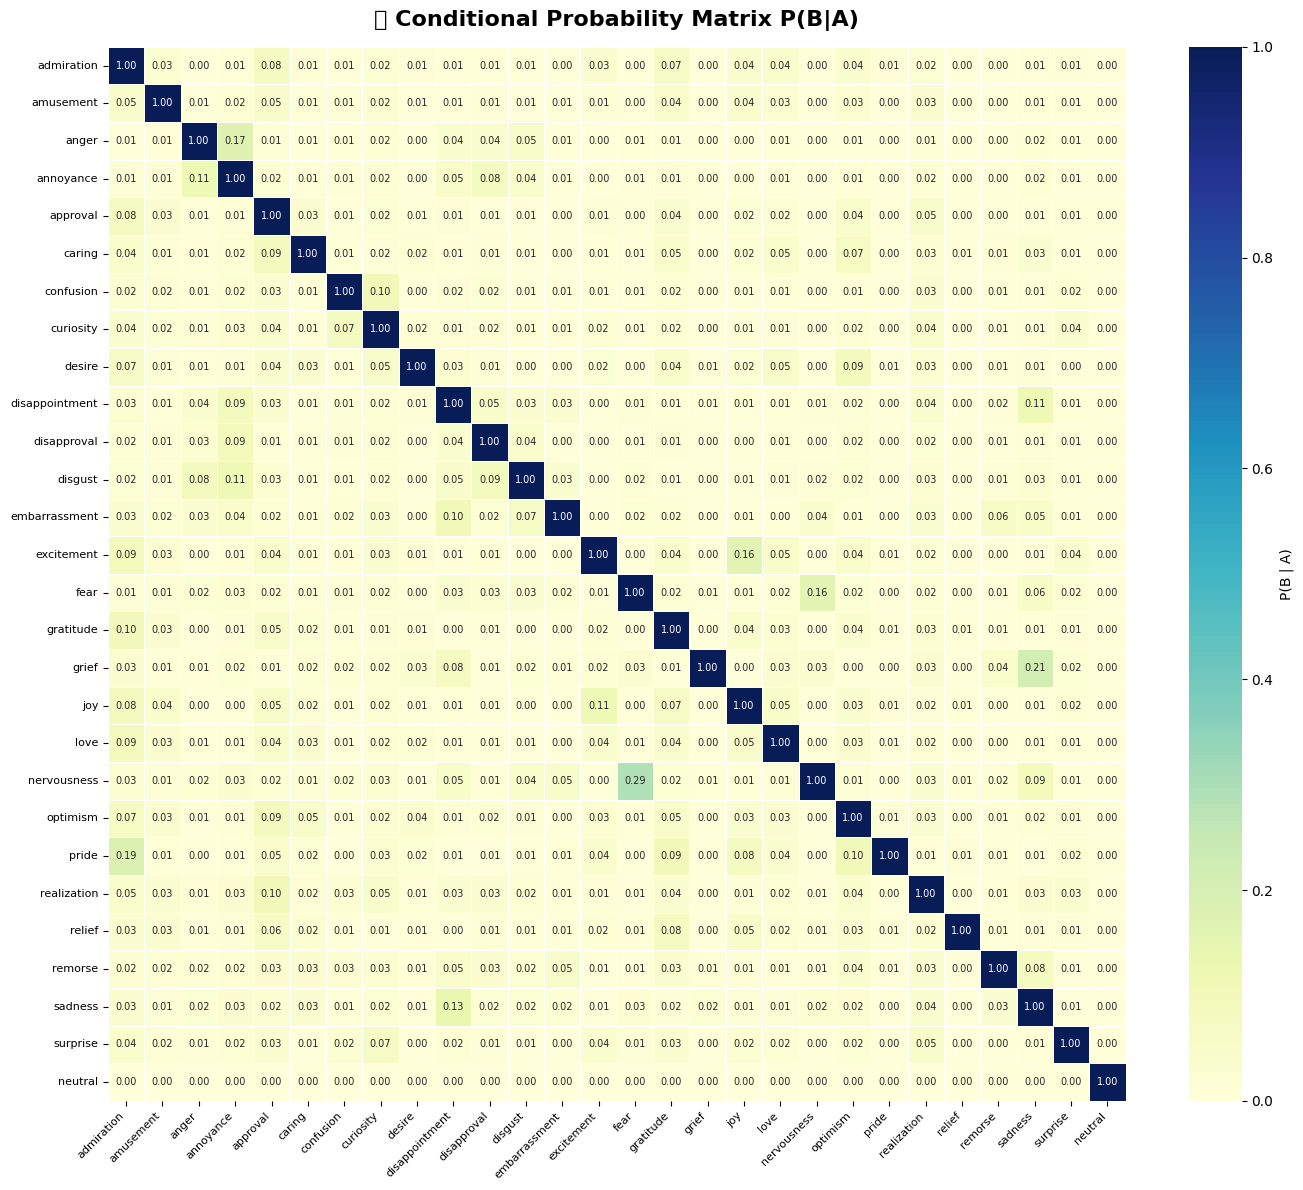

In [47]:
# --- Conditional Probability Matrix: P(B|A) ---
co_occurrence = np.dot(df_goemotions[emotion_cols].T.values, df_goemotions[emotion_cols].values)
co_df = pd.DataFrame(co_occurrence, index=emotion_cols, columns=emotion_cols)

# Compute conditional probability P(B|A) = co_occurrence[A,B] / co_occurrence[A,A]
p_b_given_a = co_df.div(np.diag(co_df), axis=0)

# --- Heatmap Visualization ---
plt.figure(figsize=(14, 12))
sns.heatmap(
    p_b_given_a,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    linewidths=0.5,
    linecolor="white",
    cbar_kws={'label': 'P(B | A)'},
    annot_kws={"size": 7}
)

plt.title("🔹 Conditional Probability Matrix P(B|A)", fontsize=16, weight='bold', pad=15)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.show()


In [48]:
from IPython.display import display

print("📈 Top 10 Cumulative Coverage Combinations:")
display(cumulative_coverage_top10)

print("\n📌 Multi-label Rate per Emotion:")
df_multi_label = multi_label_rate.reset_index().rename(columns={0: 'Multi-label Rate'})
display(df_multi_label)


📈 Top 10 Cumulative Coverage Combinations:


,Combination,Cumulative Coverage
0,"(neutral,)",0.267962
1,"(approval,)",0.320637
2,"(admiration,)",0.371250
3,"(gratitude,)",0.407365
4,"(annoyance,)",0.443099
5,"(disapproval,)",0.478799
6,"(amusement,)",0.508401
7,"(curiosity,)",0.537068
8,"(love,)",0.561456
9,"(anger,)",0.585828



📌 Multi-label Rate per Emotion:


,index,Multi-label Rate
0,admiration,0.395782
1,amusement,0.352652
2,anger,0.363924
3,annoyance,0.405647
4,approval,0.371434
5,caring,0.428121
6,confusion,0.331996
7,curiosity,0.402527
8,desire,0.434353
9,disappointment,0.453623


In [45]:
from scipy.stats import entropy

# Count of each unique label combination
combination_counts = df_goemotions[emotion_labels].astype(str).agg(''.join, axis=1).value_counts()

# Normalize to get probabilities
combination_probs = combination_counts / combination_counts.sum()

# Compute entropy (base 2 for bits)
label_combination_entropy = entropy(combination_probs, base=2)

print(f"\n🧮 Entropy of Label Combination Distribution: {label_combination_entropy:.4f} bits")



🧮 Entropy of Label Combination Distribution: 0.8403 bits
